#####  Problem Statement

About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows:

 Sales -- Unit sales (in thousands) at each location

 Competitor Price -- Price charged by competitor at each location

 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or not

The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


#### Import Necessary Libraries

In [107]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#### Read the CSV File into  Pandas DataFrame

In [17]:
company_data = pd.read_csv("Company_Data.csv")

#### Data Understanding

In [18]:
company_data.shape

(400, 11)

In [19]:
company_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [20]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [21]:
company_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [22]:
non_numeric_cols = [i for i in company_data.columns if i not in company_data.describe().columns] # These are the non Numeric Columns

In [23]:
for i in range(len(non_numeric_cols)):
    print(company_data[non_numeric_cols[i]].value_counts())

ShelveLoc
Medium    219
Bad        96
Good       85
Name: count, dtype: int64
Urban
Yes    282
No     118
Name: count, dtype: int64
US
Yes    258
No     142
Name: count, dtype: int64


In [24]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


#### Data Preprocessing 
#### Encoding
-- Using Label Endoder  as there are only 2 distinct values for the Column US, and Urban


In [25]:
le=LabelEncoder()
company_data['US'] = le.fit_transform(company_data['US'])
company_data['Urban'] = le.fit_transform(company_data['Urban'])

In [26]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


-- Using OrdinalEncoder as the ShelveLoc column has ranked categories - Good, Medium and Bad

In [27]:
shelve = ['Good', 'Medium','Bad']
oe = OrdinalEncoder(categories=[shelve])
company_data['ShelveLoc'] = oe.fit_transform(company_data[['ShelveLoc']])

In [28]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,2.0,42,17,1,1
1,11.22,111,48,16,260,83,0.0,65,10,1,1
2,10.06,113,35,10,269,80,1.0,59,12,1,1
3,7.40,117,100,4,466,97,1.0,55,14,1,1
4,4.15,141,64,3,340,128,2.0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,0.0,33,14,1,1
396,6.14,139,23,3,37,120,1.0,55,11,0,1
397,7.41,162,26,12,368,159,1.0,40,18,1,1
398,5.94,100,79,7,284,95,2.0,50,12,1,1


#### Splitting X and y from the Encoded Data

In [30]:
X = company_data.drop(labels=['Sales'], axis = 1)
y = company_data[['Sales']]

#### Scaling 
##### STANDARD SCALER Is nothing but the Standard Normal Distribution Formula Z = (X-mean)/std deviation

mean_ : will give you the mean of all the columns you have passed in to the fit()

scale_ : will give you the std deviations of all the columns you have passed in to the fit()

get_feature_names_out() : will give you all the fearures which are being scaled

In [35]:
scaler = StandardScaler()

In [38]:
scaler.fit(X)

StandardScaler()

In [54]:
scaler.mean_

array([124.975 ,  68.6575,   6.635 , 264.84  , 115.795 ,   1.0275,
        53.3225,  13.9   ,   0.705 ,   0.645 ])

In [46]:
scaler.scale_

array([ 15.31533137,  27.95103207,   6.642046  , 147.19210033,
        23.64705003,   0.67211885,  16.1800338 ,   2.61725047,
         0.45604276,   0.47851332])

In [51]:
scaler.get_feature_names_out()

array(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'], dtype=object)

In [57]:
(138 - 124.975) / 15. # example

0.8683333333333337

In [58]:
X_scaled = scaler.transform(X)

In [60]:
X_scaled.shape

(400, 10)

####  Convering the scaled  array to a DataFrame

In [62]:
X_scaled  = pd.DataFrame(data = X_scaled, columns=X.columns)

In [63]:
X_scaled

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.850455,0.155361,0.657177,0.075819,0.177823,1.446917,-0.699782,1.184449,0.646869,0.741881
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,-1.528747,0.721723,-1.490113,0.646869,0.741881
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,-0.040915,0.350895,-0.725953,0.646869,0.741881
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,-0.040915,0.103677,0.038208,0.646869,0.741881
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,1.446917,-0.947000,-0.343872,0.646869,-1.347925
...,...,...,...,...,...,...,...,...,...,...
395,0.850455,1.407551,1.560513,-0.420131,0.516132,-1.528747,-1.256023,0.038208,0.646869,0.741881
396,0.915749,-1.633482,-0.547271,-1.547909,0.177823,-0.040915,0.103677,-1.108033,-1.545908,0.741881
397,2.417512,-1.526151,0.807733,0.700853,1.827078,-0.040915,-0.823391,1.566529,0.646869,0.741881
398,-1.630719,0.370022,0.054953,0.130170,-0.879391,1.446917,-0.205346,-0.725953,0.646869,0.741881


#### Checking the dependent Variable Sales and its distribution to make it a Categorical Variable 

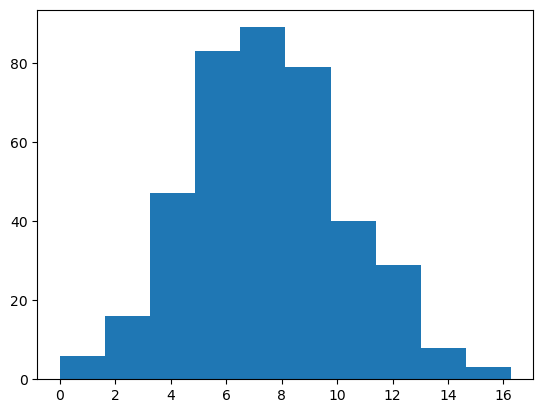

In [75]:
plt.hist(x= y['Sales'])
plt.show()

In [70]:
y[['Sales']].describe()

,Sales
count,400.000000
mean,7.496325
std,2.824115
min,0.000000
25%,5.390000
50%,7.490000
75%,9.320000
max,16.270000


#### Converting the Sales from numerical to Categorical Feature as Requested in the Problem Statement

In [76]:
def sales_categories(sales):
    if sales <= 4:
        return 'low'
    elif sales >= 12:
        return 'high'
    else:
        return 'medium'

In [77]:
y['Sales'] = list(map(sales_categories, y['Sales']))

C:\Users\piyus\AppData\Local\Temp\ipykernel_30440\62952601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Sales'] = list(map(sales_categories, y['Sales']))


In [79]:
y[['Sales']]

,Sales
0,medium
1,medium
2,medium
3,medium
4,medium
...,...
395,high
396,medium
397,medium
398,medium


In [121]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(), 
             param_grid= {'max_depth' :[i for i in range(2,11)],
                         },cv = 5 )

In [ ]:
grid.fit(X_scaled, y)

In [118]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 2}

In [110]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [111]:
y_pred_train = dt_model.predict(X_train)
y_pred_train

array(['medium', 'medium', 'medium', 'medium', 'low', 'medium', 'medium',
       'medium', 'medium', 'medium', 'high', 'medium', 'medium', 'medium',
       'medium', 'medium', 'high', 'medium', 'medium', 'medium', 'medium',
       'low', 'medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'low', 'medium', 'medium', 'medium', 'low', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium', 'low',
       'medium', 'low', 'low', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'low', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'low', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'low', 'high', 'medium', 'high', 'medium',
       'medium', 'medium', 'high', 'medium', 'medium', 'medium', 'medium',
       'medium', 'low', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medi

In [112]:
accuracy_score(y_train, y_pred_train)

1.0

In [113]:
y_pred_test = dt_model.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.81

In [132]:
results = pd.DataFrame(grid.cv_results_)

In [135]:
results[['params','mean_test_score' ]]

,params,mean_test_score
0,{'max_depth': 2},0.8375
1,{'max_depth': 3},0.8325
2,{'max_depth': 4},0.8100
3,{'max_depth': 5},0.8075
4,{'max_depth': 6},0.8150
5,{'max_depth': 7},0.8000
6,{'max_depth': 8},0.8025
7,{'max_depth': 9},0.7875
8,{'max_depth': 10},0.7875


#### Trying out with MinMaxScaler Input 

In [136]:
min_max_scaler = MinMaxScaler()

In [137]:
min_max_scaler.fit(X)

MinMaxScaler()

In [141]:
X_minmax_scaled = min_max_scaler.transform(X)

In [143]:
X_minmax_scaled = pd.DataFrame(X_minmax_scaled, columns= X.columns)

In [147]:
X_minmax_scaled['ShelveLoc'].value_counts()

ShelveLoc
0.5    219
1.0     96
0.0     85
Name: count, dtype: int64

In [149]:
grid_2  = GridSearchCV(DecisionTreeClassifier(),
            param_grid={'max_depth' : [i for i in range(2,10)]}, 
            cv= 5)

In [150]:
grid_2.fit(X_minmax_scaled, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]})

####  Score stays the same for both the scaling and Max Depth - The HyperParameter doesn't change, stays 2 

In [159]:
grid_2.best_score_

0.8375

In [162]:
from pickle import dump, load

In [163]:
dump(grid,open('DT_MAX_DEPTH2','wb'))

In [164]:
DT_MAX_DEPTH2 = load(open('DT_MAX_DEPTH2','rb'))

#### Scaling is still required for the prediction from clients end

In [170]:
accuracy_score(y,DT_MAX_DEPTH2.predict(X_scaled))

0.85